In [1]:
#extracting data from csv files into numpy arrays
from numpy import genfromtxt
import numpy as np
x_train = genfromtxt('train_data1.csv', delimiter=',')
y_train = genfromtxt('train_labels1.csv', delimiter=',')
x_test = genfromtxt('test_data1.csv', delimiter=',')
y_test = genfromtxt('test_labels1.csv', delimiter=',')

In [2]:
#shape
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((108, 180), (27, 180), (108,), (27,))

In [3]:
#converting to one hot
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes=9)
y_test = to_categorical(y_test, num_classes=9)
y_train.shape,y_test.shape

((108, 9), (27, 9))

In [4]:
#reshaping to 2D 
x_train=np.reshape(x_train,(x_train.shape[0], 36,5))
x_test=np.reshape(x_test,(x_test.shape[0], 36,5))
x_train.shape,x_test.shape

((108, 36, 5), (27, 36, 5))

In [5]:
#reshaping to shape required by GRU
x_train=np.reshape(x_train,(x_train.shape[0], 36,5))
x_test=np.reshape(x_test,(x_test.shape[0], 36,5))

In [6]:
#shapes
x_train.shape,x_test.shape

((108, 36, 5), (27, 36, 5))

In [7]:
from keras import Sequential
from keras import optimizers
from keras.layers import Dense,Dropout,Activation,SimpleRNN,GRU

In [8]:
model = Sequential()

In [9]:
#adding layers and forming the model
model = Sequential()
model.add(GRU(256, activation="relu", input_shape=(36,5), return_sequences=True))
model.add(Dropout(0.15))

model.add(GRU(128, activation="relu"))
model.add(Dropout(0.15))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(units=9,activation='softmax'))

In [10]:
#compiling
model.compile(optimizer=optimizers.Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
#fitting
history = model.fit(x_train,y_train,epochs=15,validation_data=(x_test,y_test),batch_size=40)

Epoch 1/15
3/3 [==============================] - 0s 116ms/step - loss: 0.8231 - accuracy: 0.6019 - val_loss: 0.6617 - val_accuracy: 0.6667
Epoch 2/15
3/3 [==============================] - 0s 80ms/step - loss: 0.8035 - accuracy: 0.6111 - val_loss: 0.7272 - val_accuracy: 0.6296
Epoch 3/15
3/3 [==============================] - 0s 94ms/step - loss: 0.7513 - accuracy: 0.6389 - val_loss: 0.6384 - val_accuracy: 0.6296
Epoch 4/15
3/3 [==============================] - 0s 84ms/step - loss: 0.7222 - accuracy: 0.6481 - val_loss: 0.6553 - val_accuracy: 0.7407
Epoch 5/15
3/3 [==============================] - 0s 87ms/step - loss: 0.6877 - accuracy: 0.6944 - val_loss: 0.7232 - val_accuracy: 0.7037
Epoch 6/15
3/3 [==============================] - 0s 86ms/step - loss: 0.6822 - accuracy: 0.6852 - val_loss: 0.6969 - val_accuracy: 0.7037
Epoch 7/15
3/3 [==============================] - 0s 88ms/step - loss: 0.6675 - accuracy: 0.7222 - val_loss: 0.5679 - val_accuracy: 0.8148
Epoch 8/15
3/3 [==========

In [12]:
#Saving the model
import h5py
model.save('RNNmodel.h5')

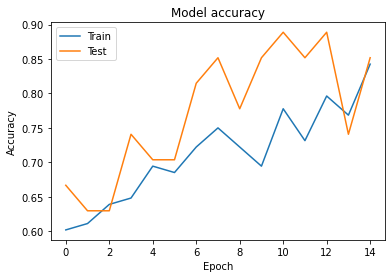

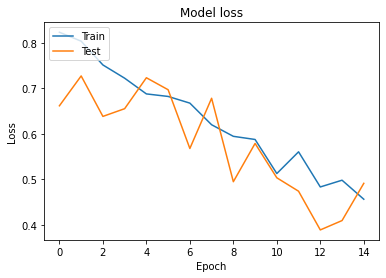

In [18]:
import matplotlib.pyplot as plt


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [14]:
#train and test loss and scores respectively
train_loss_score=model.evaluate(x_train,y_train)
test_loss_score=model.evaluate(x_test,y_test)
print(train_loss_score)
print(test_loss_score)

1/1 [==============================] - 0s 31ms/step - loss: 0.7550 - accuracy: 0.5556
[0.7240528464317322, 0.6851851940155029]
[0.7549933195114136, 0.5555555820465088]


In [15]:
#Saving the model
import h5py
model.save('GRUmodel.h5')

In [16]:
x_test[43]

IndexError: index 43 is out of bounds for axis 0 with size 27

In [ ]:
y_test[43]

In [ ]:
from keras.models import load_model
model1 = load_model("GRUmodel.h5")
model1.predict(np.array([[[-2.73306311e+02,  1.58642348e+02, -2.51804661e+01,
         2.86019095e+01,  6.99706422e+00],
       [-1.42294665e+01, -2.34645073e+01, -6.28480623e+00,
        -8.65793279e+00, -4.55593675e+00],
       [-6.92275717e+00,  5.60497474e+00,  3.16393417e+00,
        -1.47657957e+01,  1.51526806e+01],
       [-3.17696095e+00, -1.23760858e+01,  3.91984523e+00,
        -4.87903315e+00, -4.95804955e+00],
       [-4.49944483e+00, -1.37032968e+00, -3.22835255e+00,
        -4.88906624e+00, -3.42968136e+00],
       [-6.82397100e+00, -2.99805555e+00, -6.23055454e-01,
        -6.58288230e+00, -2.35257537e+00],
       [-9.68074613e-01, -4.47761105e+00, -2.84575784e+00,
        -3.32549884e+00, -1.56158142e+00],
       [-2.29576016e+00,  1.29711570e+00,  4.93674808e+00,
         6.87433310e+00,  7.94018623e+00],
       [ 4.93491897e-01,  6.94870545e+00,  4.72268216e+00,
         1.18707843e+01,  2.44250603e+01],
       [ 2.88819540e+01,  4.10303611e+01,  1.16491604e+01,
         1.10405546e+01,  2.44277799e+00],
       [ 4.24940737e-01,  5.28936982e-01,  2.60800369e-01,
         3.48806603e-01,  2.33123275e-01],
       [ 2.98151289e-01,  3.37060296e-01,  3.26388803e-01,
         2.14382093e-01,  2.34875481e-01],
       [ 3.28661707e-01,  2.62339352e-01,  1.66294454e-01,
         3.66376503e-01,  3.56937573e-01],
       [ 2.58143551e-01,  5.20451234e-02,  1.15097583e-02,
         5.69027397e-03,  1.80453274e-02],
       [ 2.85969803e-02,  6.79184780e-03,  3.17920136e-03,
         8.93570531e-04,  2.61840371e-04],
       [ 2.62720411e-04,  8.96713784e-04,  5.93085915e-04,
         2.74660863e-04,  8.97915254e-05],
       [ 2.12655137e-01,  1.97313694e-01,  1.75298747e-01,
         1.66637303e-01,  2.23772606e-01],
       [ 2.88540718e-01,  3.31788830e-01,  3.27104943e-01,
         2.71053675e-01,  2.47357864e-01],
       [ 2.37464255e-01,  2.06004030e-01,  1.80851936e-01,
         1.63070244e-01,  1.42943428e-01],
       [ 1.54220044e-01,  1.82762187e-01,  1.92736980e-01,
         1.93404270e-01,  2.05244891e-01],
       [ 2.23008455e-01,  2.60471854e-01,  2.91963973e-01,
         3.05896983e-01,  2.98556535e-01],
       [ 2.96887032e-01,  2.34715227e-01,  1.68456863e-01,
         1.37714199e-01,  1.35147186e-01],
       [ 1.37832849e-01,  1.32582068e-01,  1.36611312e-01,
         1.37090875e-01,  1.31253257e-01],
       [ 1.28245810e-01,  1.26265496e-01,  1.44856372e-01,
         1.74492954e-01,  2.04268323e-01],
       [ 4.40323258e-01,  4.20860309e-01,  3.63451963e-01,
         3.20953109e-01,  2.81858744e-01],
       [ 2.85603751e-01,  2.52891314e-01,  2.08028595e-01,
         2.17863441e-01,  2.88517820e-01],
       [ 3.23457009e-01,  3.22333969e-01,  3.49040201e-01,
         4.01179050e-01,  4.59604378e-01],
       [ 5.21913709e-01,  4.95070702e-01,  4.49427668e-01,
         4.13891321e-01,  3.30843765e-01],
       [ 2.80339507e-01,  2.75916936e-01,  2.73124866e-01,
         2.69720095e-01,  2.60734315e-01],
       [ 2.23099839e-01,  2.15500744e-01,  2.19637542e-01,
         2.11599443e-01,  2.15562043e-01],
       [ 2.67638663e-01,  2.98598779e-01,  3.06233626e-01,
         2.77476615e-01,  2.54093808e-01],
       [ 2.33083234e-01,  2.24740102e-01,  2.62159212e-01,
         2.97193444e-01,  3.70511422e-01],
       [ 1.57298937e-01,  1.44024625e-01,  9.01583609e-02,
         5.32888194e-02,  2.07195133e-02],
       [ 5.29473224e-02,  3.71320815e-02,  2.55161067e-02,
         1.89355182e-02,  8.03073298e-02],
       [ 1.51380939e-01,  1.17962272e-01,  1.12875647e-01,
         1.55453676e-01,  2.10270043e-01],
       [ 3.04842183e-01,  2.43425630e-01,  2.44850825e-01,
         1.75561916e-01,  9.00012125e-02],
       [ 3.99796327e-02,  3.05304041e-02,  2.46228316e-02,
         2.84191105e-02,  3.38842104e-02],
       [ 2.36045786e-02,  4.47848852e-02,  6.64761822e-02,
         6.44560076e-02,  4.87499372e-02],
       [ 7.38655223e-02,  8.89492341e-02,  1.26374655e-01,
         1.13667290e-01,  8.10978293e-02],
       [ 4.25968455e-03,  6.28639338e-03,  3.11333885e-02,
         1.16750901e-01,  1.38490457e-01]]]))